In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

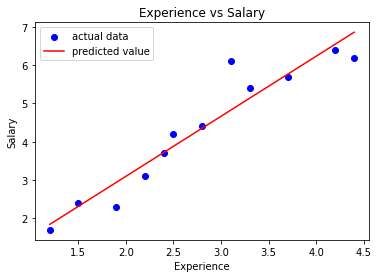

Slope:  1.567098293113596
Intercept:  -0.035638610947616556
Predicted Salary for an Experience of 5 years:  [7.79985285]


In [130]:
#1
data = pd.read_csv("sales.csv")
exp = data['experience'].values
sal = data['salary'].values
exp = exp.reshape(-1,1)

model = LinearRegression()
model.fit(exp,sal)
sPred = model.predict(exp)

plt.scatter(exp,sal,color='b',label='actual data')
plt.plot(exp,sPred,color='r',label='predicted value')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()

slope = model.coef_[0]
intercept = model.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

nExp = np.array([[5]])
nVal = model.predict(nExp)
print("Predicted Salary for an Experience of 5 years: ", nVal)

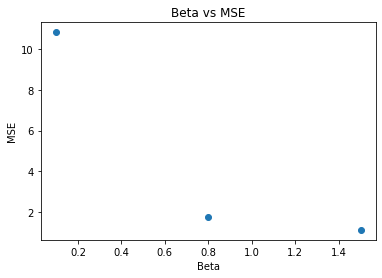

In [167]:
# 1a
slopes = [0.1, 0.8, 1.5]
b = 1.1
mseVal = []
for slope in slopes:
    predVal = b + slope*exp
    mse = np.mean((sal-predVal)**2)
    mseVal.append(mse)

plt.scatter(slopes, mseVal)
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.title(f'Beta vs MSE')
plt.show()

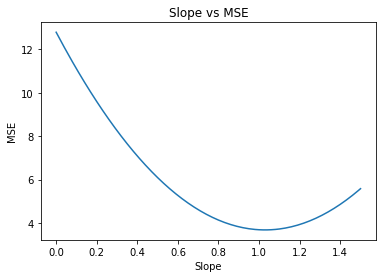

In [132]:
# 1b
mseVal = []
slopes = np.arange(0,1.51,0.01)
b = 1.1

for slope in slopes:
    predVal = b + exp*slope
    mse = np.mean((sal-predVal)**2)
    mseVal.append(mse)

plt.plot(slopes, mseVal)
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title(f'Slope vs MSE')
plt.show()

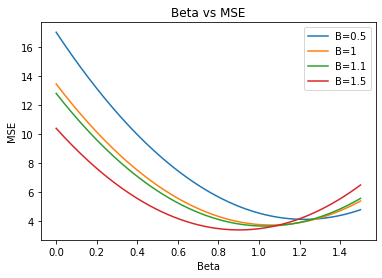

In [133]:
# 1c
slopes = np.arange(0,1.51,0.01)
b = [0.5, 1, 1.1, 1.5]
finalMseVal = []
for i in b:
    mseVal = []
    for slope in slopes:
        predVal = i+exp*slope
        mse = np.mean((sal-predVal)**2)
        mseVal.append(mse)
    finalMseVal.append(mseVal)
plt.plot(slopes,finalMseVal[0], label='B=0.5')
plt.plot(slopes,finalMseVal[1], label='B=1')
plt.plot(slopes,finalMseVal[2], label='B=1.1')
plt.plot(slopes,finalMseVal[3], label='B=1.5')
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.title(f'Beta vs MSE')
plt.legend()
plt.show()



In [134]:
# 1d
mseSklearn = []
model = LinearRegression()
model.fit(exp.reshape(-1, 1), sal)

salPredSklearn = model.predict(exp.reshape(-1, 1))
mseSklearn = mean_squared_error(sal, salPredSklearn)

print("MSE using scikit-learn:", mseSklearn)

MSE using scikit-learn: 0.23366710810280558


In [135]:
#2

In [143]:
def cost(actual, predicted):
    return np.sum(np.square(actual-predicted))/2/len(actual)

In [144]:
def gradients(x,y,predicted):
    n = len(x)
    w = -1*np.sum(y-predicted)/n
    b = -1*np.sum((y-predicted)*x)/n
    return w,b

In [145]:
def predict(x,weight,bias):
    return weight*x+bias

In [146]:
def gradientDescent(x,y, epoch, alpha=0.1):
    weight = []
    biases = []
    costs = []
    theta = random.random()
    bias = random.random()
    for i in range(epoch):
        predicted = predict(x,theta, bias)
        error = cost(y,predicted)
        delW, delB = gradients(x,y,predicted)
        theta -= alpha*delW
        bias -= alpha*delB
        if i%5==0:
            weight.append(theta)
            biases.append(bias)
            costs.append(error)
    
    return theta, bias, weight, biases, costs

Text(0.5, 1.0, 'Error vs Iteration')

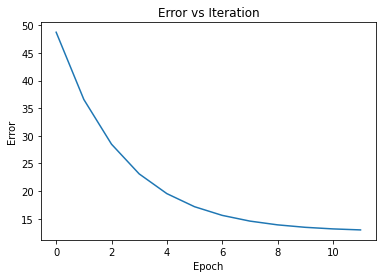

In [151]:
data = pd.read_csv("sales.csv")
x = np.array(data['experience'])
y = np.array(data['salary'])
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=0)
weight, bias, weights, biases, errors = gradientDescent(xtrain, ytrain ,60, alpha = 0.001)

#2a
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title('Error vs Iteration')

In [160]:
#2b
from sklearn.linear_model import SGDRegressor as lr
model = lr( alpha = 0.01)
modelWeight, modelBias, modeError = [],[],[]
for i in range(60):
    model.partial_fit(np.array(xtrain).reshape(-1,1), np.array(ytrain).reshape(-1,1).ravel())
    if i%5==0:
        modelWeight.append(model.coef_[0])
        modelBias.append(model.intercept_[0])
        modeError.append(cost(ytest, model.predict(xtest.reshape(-1,1))))

print(modelWeight, end ='\n')
print("\nBias:\n")
print(modelBias, end = '\n')
print("\nError:\n")
print(modeError, end = '\n')

[0.5243224010201977, 1.199097839069293, 1.3537535158478455, 1.406094991936397, 1.426290062476368, 1.4374803955136757, 1.4454544666404308, 1.4490524011393981, 1.452837898073029, 1.4573481821283556, 1.4607366590443902, 1.464067171519651]

Bias:

[0.18727171521500321, 0.421094864429244, 0.4631007900190495, 0.46886026061534597, 0.46370580274027345, 0.45612195731463223, 0.44804262114268045, 0.43880244192681217, 0.4301556584662905, 0.4222146301173637, 0.41409205722984205, 0.40620131893515615]

Error:

[5.3040092170481135, 0.21107367572310087, 0.016609536248142445, 0.02861487145485852, 0.04150534502420893, 0.04942385977204226, 0.05501208748035829, 0.056185440220217826, 0.0577282251168438, 0.06025253544849767, 0.06159394796727987, 0.06295939252574612]


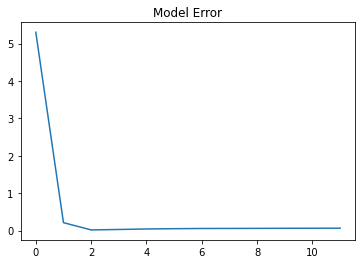

In [164]:
#2c
plt.plot(modeError, label = 'sklearn')
plt.title('Model Error')
plt.show()

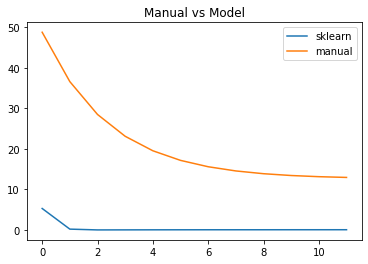

In [165]:
plt.plot(modeError, label = 'sklearn')
plt.plot(errors, label = 'manual')
plt.legend()
plt.title('Manual vs Model')
plt.show()

In [140]:
#another method

In [136]:
data = pd.read_csv("sales.csv")
exp = data['experience'].values
sal = data['salary'].values

learningRate = 0.001
iterN = 60
batchSize = 1 
sampleN = len(exp)
batchN = sampleN // batchSize
B0 = 0
B1 = 0
errors = []
iterations = []

for iteration in range(iterN):
    for _ in range(batchN):
        random_index = np.random.randint(sampleN)
        x = exp[random_index]
        y = sal[random_index]
        y_pred = B0 + B1 * x
        gradient_B0 = -2 * (y - y_pred)
        gradient_B1 = -2 * x * (y - y_pred)
        B0 -= learningRate * gradient_B0
        B1 -= learningRate * gradient_B1
        error = np.mean((sal - (B0 + B1 * exp))**2)
        errors.append(error)
        iterations.append(iteration)

print(f'Final B0: {B0}')
print(f'Final B1: {B1}')
print(f'Final Error: {error}')

Final B0: 0.39559563897137484
Final B1: 1.4216399360986725
Final Error: 0.25446744436324836


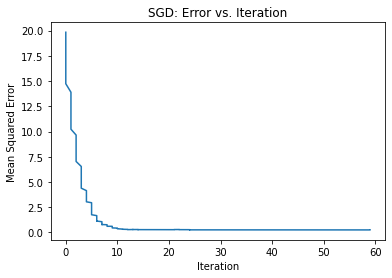

In [137]:
plt.plot(iterations, errors)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('SGD: Error vs. Iteration')
plt.show()

In [138]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=5, tol=None)
errors_sklearn = []
iterations_sklearn = []

for iteration in range(n_iterations):
    for _ in range(5):
        model.fit(experience.reshape(-1, 1), salary)
        salary_pred = model.predict(experience.reshape(-1, 1))
        error = mean_squared_error(salary, salary_pred)
        errors_sklearn.append(error)
        iterations_sklearn.append(iteration)

print(f'Final B0: {model.intercept_[0]}')
print(f'Final B1: {model.coef_[0]}')
print(f'Final Error: {errors_sklearn[-1]}')

Final B0: 0.4171880071504243
Final B1: 1.4070211658412357
Final Error: 0.25795289931207704


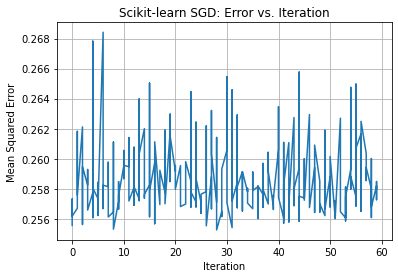

In [139]:
plt.plot(iterations_sklearn, errors_sklearn)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Scikit-learn SGD: Error vs. Iteration')
plt.grid()
plt.show()